## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)
data.set_pred_range(0.0, 5.0, n=200)

mosm = mogptk.MOSM(data, Q=3)
mosm.estimate_params()
mosm.train()
mosm.predict()

data.plot()
```

In [3]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

import matplotlib as plt
plt.rcParams["figure.figsize"] = (12,8)

0.5
2 0.5
[0. 1.]
[]
[]


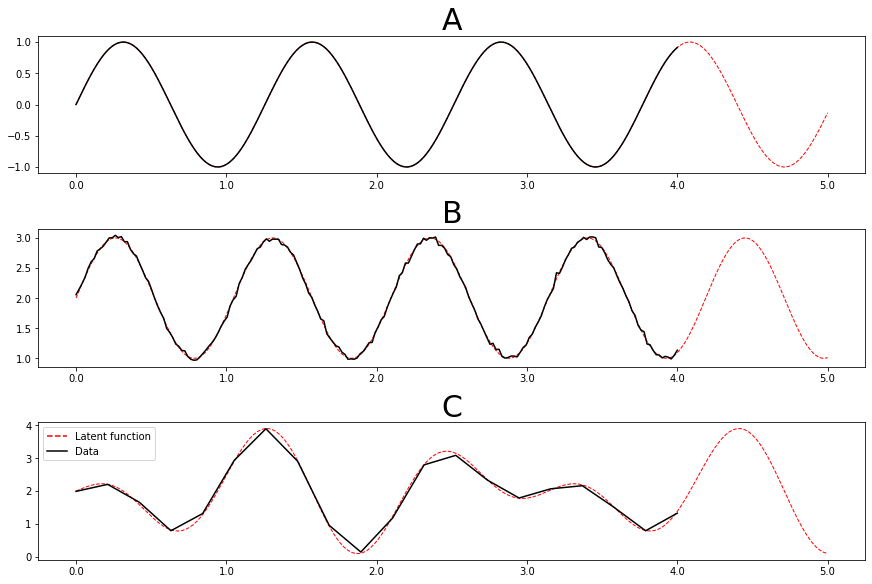

In [33]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

data = mogptk.DataSet()
data.append(mogptk.LoadFunction(lambda x: np.sin(5*x[:,0]), n=200, start=0.0, end=4.0, name='A'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2 - np.sin(4*x[:,0]), n=20, start=0.0, end=4.0, var=0.03, name='C'))

data[0].remove_random_ranges(n=2, duration=.5)

data[0].set_pred_range(0.0, 5.0, n=200)
data[1].set_pred_range(0.0, 5.0, n=200)
data[2].set_pred_range(0.0, 5.0, n=200)

data.plot();

In [ ]:
data[0].transform(mogptk.TransformLog)
data[0].plot()

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.predict(plot=True)

## MOSM

In [ ]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

In [ ]:
mosm.estimate_params(method='SM')
mosm.print_params()

In [ ]:
mosm.train()
mosm.print_params()

In [ ]:
mosm.predict(plot=True)

### Plot

In [ ]:
mosm.plot()

In [ ]:
mosm.plot_psd()

In [ ]:
mosm.plot_correlations()

In [ ]:
mosm.info()

### Saving and loading

In [ ]:
mosm.save_params('mosm')
mosm.print_params()

In [ ]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

In [ ]:
mosm2.predict(plot=True)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

In [ ]:
smlmc.estimate_params(method='BNSE')
smlmc.print_params()

In [ ]:
smlmc.train()
smlmc.print_params()

In [ ]:
smlmc.predict(plot=True)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

In [ ]:
csm.estimate_params(method='BNSE')
csm.print_params()

In [ ]:
csm.train()
csm.print_params()

In [ ]:
csm.predict(plot=True)

## CONV

In [ ]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

In [ ]:
conv.estimate_params(method='SM')
conv.print_params()

In [ ]:
conv.train(method='Adam')
conv.print_params()

In [ ]:
conv.predict(plot=True)

## Errors